# Lab: Image Captioning

The full lab can be found at https://learn.deeplearning.ai/

- Load the Model and the Processor.

In [1]:
from transformers import BlipForConditionalGeneration

2024-12-03 16:36:23.780974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733240183.801197  198238 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733240183.807459  198238 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 16:36:23.828177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [3]:
from transformers import AutoProcessor

In [4]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

- Load the image.

In [5]:
from PIL import Image
import requests

In [6]:
url = "https://www.lalux.lu/fileadmin/_processed_/e/3/csm_0_8bf712bc67.jpg"
image = Image.open(requests.get(url, stream=True).raw)

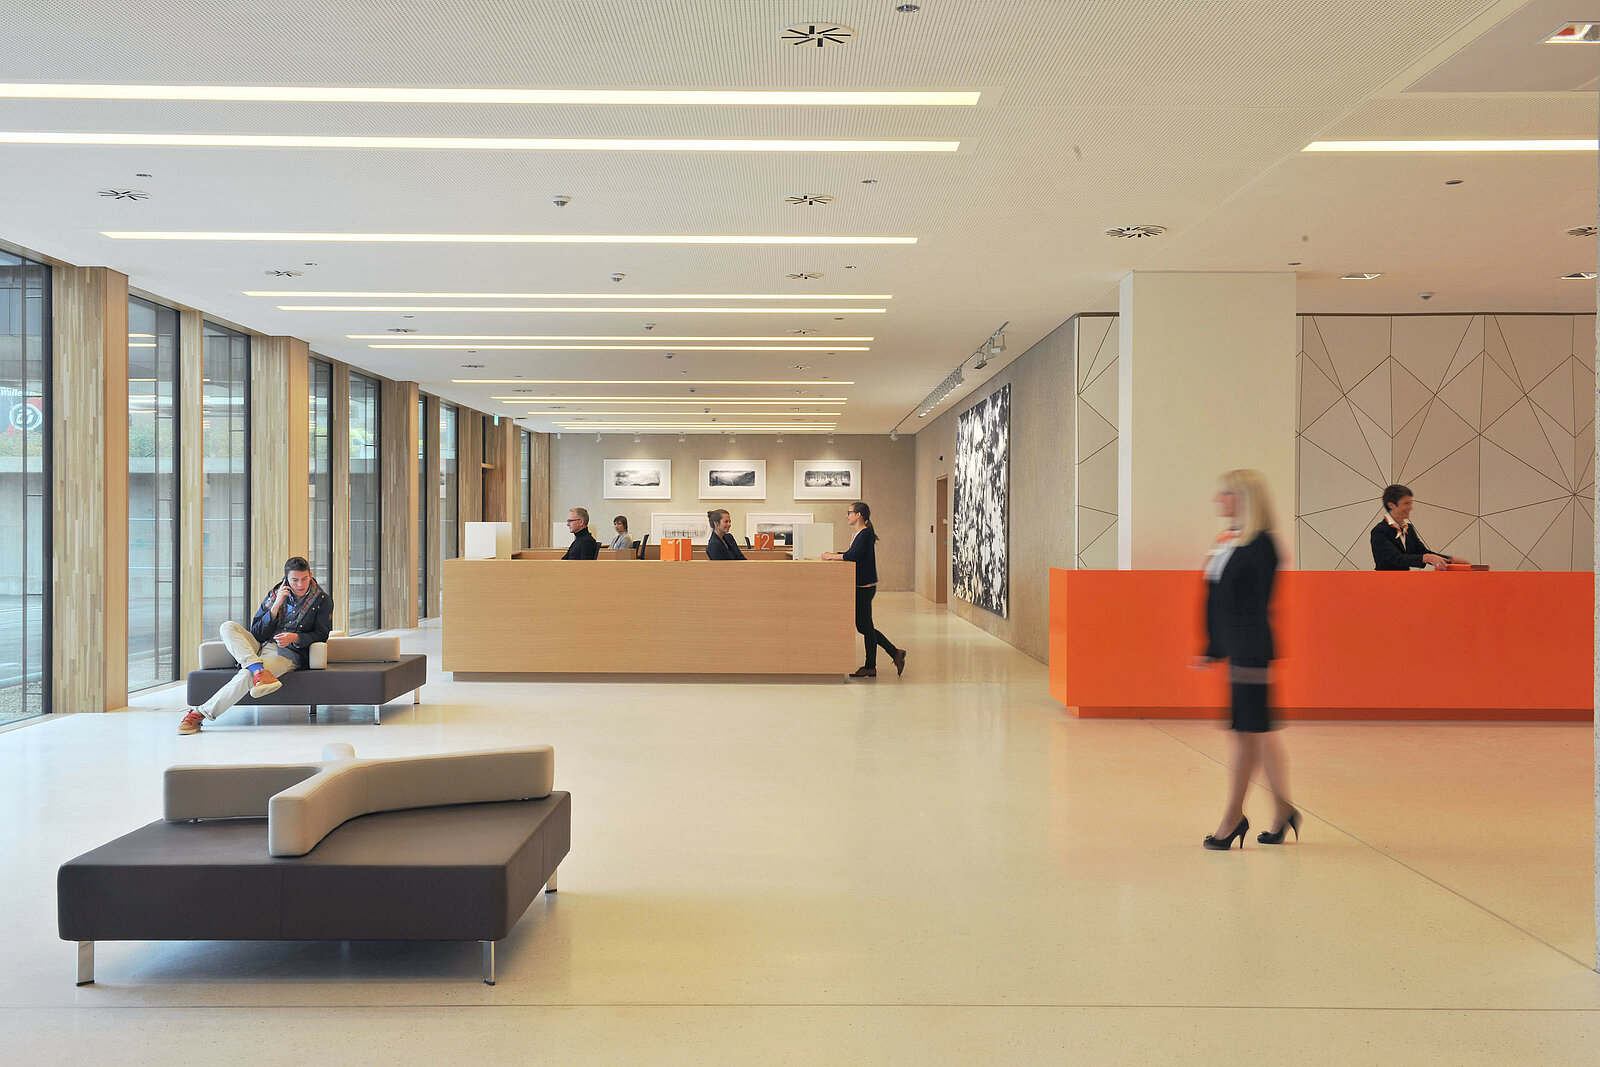

In [7]:
image

### Image Captioning

In [8]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

In [9]:
inputs

{'pixel_values': tensor([[[[0.9376, 0.9668, 0.9230,  ..., 0.6603, 0.6603, 0.6603],
          [0.9230, 0.9522, 0.9522,  ..., 0.6603, 0.6749, 0.6311],
          [0.9230, 0.9376, 0.9522,  ..., 0.6749, 0.6749, 0.6165],
          ...,
          [1.1128, 1.1274, 1.1128,  ..., 1.0982, 1.0544, 1.1128],
          [1.1274, 1.1128, 1.1420,  ..., 1.0836, 1.0690, 1.1128],
          [1.1274, 1.1128, 1.1274,  ..., 1.0836, 1.1274, 1.0982]],

         [[1.1294, 1.0994, 1.0544,  ..., 0.4540, 0.4540, 0.4390],
          [1.1294, 1.1144, 1.0994,  ..., 0.4540, 0.4390, 0.4390],
          [1.1294, 1.1294, 1.1294,  ..., 0.4390, 0.4240, 0.4390],
          ...,
          [1.2194, 1.2194, 1.2344,  ..., 1.0093, 0.9643, 1.0243],
          [1.2344, 1.2194, 1.2344,  ..., 0.9493, 0.9793, 1.0093],
          [1.2344, 1.2194, 1.2344,  ..., 0.9493, 0.9643, 0.9793]],

         [[1.2216, 1.1647, 1.1078,  ..., 0.3115, 0.2831, 0.2688],
          [1.1505, 1.1505, 1.1505,  ..., 0.2973, 0.2831, 0.2688],
          [1.1789, 1.2074

In [10]:
out = model.generate(**inputs)

In [11]:
out

tensor([[30522,  1037,  9982,  1997,  1037,  9568,  2007,  2111,  3788,  2011,
           102]])

In [12]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a lobby with people walking by
